# Assessing our models (in reverse order)
* Supervised: Regression
    * mean squared error (MSE) and coefficient of determination (R^2)
* Supervised: Classification
    * accuracy, precision, recall, confusion matrix
* Unsupervised: Clustering 
    * inertia, silhoette coefficient

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn.datasets
import sklearn.cluster
import sklearn.linear_model
import sklearn.metrics

## Make some data - same as before but streamlined

In [2]:
x, y = sklearn.datasets.make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
y_4regression = -3 + 2*x[:, 0] + 5*x[:, 1]

## Supervised: Regression

Regression is also supervised learning, and we need labels for our data.
* Regression is for continuous `y` values -> use `y_4regression`

We will train a linear regression algorithm.

In [3]:
# Choose the model

model = sklearn.linear_model.LinearRegression()

In [4]:
# Train the model

model.fit(x, y_4regression)

LinearRegression()

Did the model "learn" the coefficients of our equation?
* $y_{4regression} = -3 + 2x_0 + 5x_1$?

In [5]:
model.intercept_

-3.0000000000000018

In [6]:
model.coef_

array([2., 5.])

To assess the error, we need to compare the predicted y values against the dataset's actual y values.
* Make predictions with the model for all x

In [7]:
y_pred = model.predict(x)

In [8]:
# The mean squared error
print("Mean squared error: %.2f" % 
      sklearn.metrics.mean_squared_error(y_4regression, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination R^2: %.2f" % 
      sklearn.metrics.r2_score(y_4regression, y_pred))

Mean squared error: 0.00
Coefficient of determination R^2: 1.00


Those are some mighty fine values! -- Perfect!  More on this later.

## Supervised: Classification

For supervised learning, we'll assume that we do know what the labels are.
* Include `y`

We will train a classification algorithm called Logistic Regression.

In [9]:
# Choose the model

model = sklearn.linear_model.LogisticRegression()

In [10]:
# Train the model

model.fit(x, y)

LogisticRegression()

The model training "learns" the optimum parameters of the logistic equation to establish classification boundaries in the $(x_0, x_1)$ space.

In [11]:
model.intercept_

array([-5.92186438,  4.03310763,  1.88875675])

In [12]:
model.coef_

array([[ 1.21529495,  2.07528877],
       [ 1.22049657, -1.77048441],
       [-2.43579152, -0.30480435]])

To assess the error, we need to compare the predicted y values against the dataset's actual y values.
* Make predictions with the model for all x

In [13]:
y_pred = model.predict(x)

For classification, we assess the confusion matrix:

In [14]:
cm = sklearn.metrics.confusion_matrix(y, y_pred)
print(cm)

[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


Again perfect classification.

But to demonstrate additional quantitative metrics:

In [15]:
cm = sklearn.metrics.classification_report(y, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [16]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y, y_pred, average='micro'):.2%}")

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


In contrast with binary classification, calculating precision and recall (and etc) for multi-class classification problems can be computed in slightly different ways depending on how one does averaging. 

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. 

In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

## Unsupervised: Clustering

For unsupervised learning, we'll assume that we do not know what any labels are.
* Ignore `y`

We create an object for our model by calling "KMeans" with the number of clusters we want to look for

In [17]:
# Choose the model

model = sklearn.cluster.KMeans(n_clusters=3)

We then call the fit method, and pass in the data in which to identify clusters.

In [18]:
# Train the model

model.fit(x)

c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

The model now has an attribute `labels_` that stores the values of which cluster every point belongs to.

In [19]:
model.labels_

array([2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0])

To assess "goodness".... there are no labeled data to compare our predictions against.

What to do?
* measure the 'quality' of the model itself, for example:
  * Inertia
      * the within-cluster sum-of-squares
      * this is what clustering minimizes when it's being trained
  * Silhouette Coefficient
      * from scikit-learn docs: *"The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.  The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster."*
* note that clustering can be done for supervised learning too, in which case ground truth class values for each sample can be used.

In [20]:
sklearn.metrics.silhouette_score(x, model.labels_, metric='euclidean')

0.6596332095691734

In [21]:
model.inertia_

212.355503489229

Really the inertia only makes sense as a relative value, with higher or lower values on the same dataset representing higher or lower within-cluster sum-of-squares.

## Note

There are many, many metrics.  See for example [the docs for sklearn-metrics-metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

Regarding inertia, let's look at how it changes when we change the number of identified clusters:

c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chief\.conda\envs\geoprj\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is k

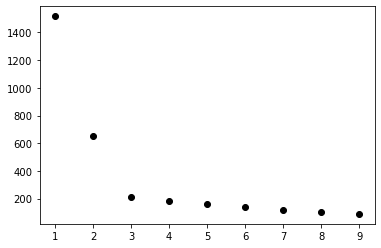

In [22]:
inertia_scores = []
cluster_num = []
for n in range(1,10):
    cluster_num.append(n)
    model = sklearn.cluster.KMeans(n_clusters=n)
    model.fit(x)
    inertia_scores.append(model.inertia_)
    
plt.plot(cluster_num,inertia_scores,'ko')

We can use this as a guide for choosing an appropriate number of clusters.